In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
path_gtex_lung = '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_lung_filtered.csv'
path_gtex_breast= '/nfs/data2/dysregnet_gtex/gtex/gene_tpm_v10_breast_mammary_tissu_filtered.csv'
path_tcga_lung = '/nfs/data2/dysregnet_gtex/gtex/tcga_lung_controls.csv'
path_tcga_breast = '/nfs/data2/dysregnet_gtex/gtex/tcga_breast_controls.csv'

In [18]:
gtex_lung = pd.read_csv(path_gtex_lung)
gtex_breast= pd.read_csv(path_gtex_breast)
tcga_lung = pd.read_csv(path_tcga_lung)
tcga_breast = pd.read_csv(path_tcga_breast)

In [38]:
#only keep genes that are in both datasets
gene_descriptions_gtex = set(gtex_breast['Description'])
gene_descriptions_tcga = set(tcga_lung['sample'])
intersect = gene_descriptions_gtex & gene_descriptions_tcga
matched_tcga_df = tcga_lung[tcga_lung['sample'].isin(intersect)]
matched_gtex_df = gtex_breast[gtex_breast['Description'].isin(intersect)]

In [39]:
#make sure genes are in the same order in both df
matched_tcga_df = matched_tcga_df.set_index('sample').loc[list(intersect)].reset_index()

matched_gtex_df = matched_gtex_df.set_index('Description').loc[list(intersect)].reset_index()


In [40]:
print(matched_gtex_df.head)

<bound method NDFrame.head of       Description  GTEX-1117F-2826-SM-5GZXL  GTEX-111YS-1926-SM-5GICC  \
0         IER3IP1                 21.309100                 21.729600   
1         ZNF252P                  6.052490                  5.049940   
2          S100A8                 59.193400                 11.077600   
3           CHRM4                  0.142900                  0.542931   
4           SEZ6L                  0.048262                  0.024180   
...           ...                       ...                       ...   
16556     ARHGEF3                  7.164740                 14.127800   
16557       MEOX1                 12.450500                 13.241000   
16558       RDH14                 29.720500                 30.639800   
16559      RFXANK                 41.129700                 41.274700   
16560     SLC25A5                256.644000                204.466000   

       GTEX-1122O-1226-SM-5H113  GTEX-117XS-1926-SM-5GICO  \
0                     18.164600 

In [42]:
#calculate median expression of genes accross both samples in both datasets
tcga_median_expression = matched_tcga_df.iloc[:, 1:].median(axis=1)  
gtex_median_expression = matched_gtex_df.iloc[:, 1:].median(axis=1)

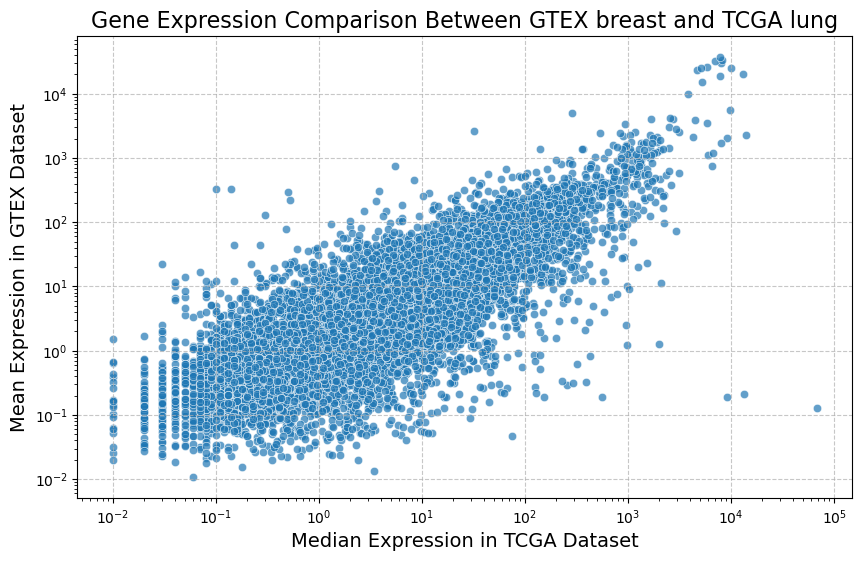

In [43]:
plt.figure(figsize=(10, 6))
#sns.scatterplot(x=tcga_median_expression, y=gtex_median_expression, alpha=0.7, )
ax = sns.scatterplot(x=tcga_median_expression, y=gtex_median_expression, alpha=0.7)

# Set logarithmic scales for both axes
ax.set_xscale('log')
ax.set_yscale('log')
# Step 4: Customize the plot
plt.title("Gene Expression Comparison Between GTEX breast and TCGA lung", fontsize=16)
plt.xlabel("Median Expression in TCGA Dataset", fontsize=14)
plt.ylabel("Mean Expression in GTEX Dataset", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Step 5: Display the plot
plt.show()